**DATASET**

Unicorn Investors wants to make an investment in a new form of transportation – JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense if they can get more than 1 Million monthly users within the next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

**Hypothesis Generation**

point out the factors which might affect our dependent variable

1. There will be an increase in traffic as the years pass by.
2. The Traffic will be High from May to October
3. Traffic on Weekdays will be More as Compared to Weekends/Holidays.
4. Traffic during the Peak Hours will be High.



Import required packages and libraries

In [1]:
import pandas as pd 
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

importing dataset

In [4]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [5]:
train_original=train.copy()
test_original=test.copy()

We have ID, Datetime, and the corresponding count of passengers in the training file. For the test file we have ID and Datetime only so we have to predict the Count for the test file.
1. ID is the unique number given to each observation point.
2. Datetime is the time of each observation.
3. The count is the passenger count corresponding to each Datetime.

In [6]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [7]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [8]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [9]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [12]:
train.shape

(18288, 3)

In [11]:
test.shape

(5112, 2)

**Feature Extraction**

We will extract the time and date from the Datetime. We have seen earlier that the data type of Datetime is an object. So first of all we have to change the data type to DateTime format otherwise we can not extract features from it.



In [13]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

We made some hypothesis for the effect of the hour, day, month, and year on the passenger count. So, let’s extract the year, month, day, and hour from the Datetime to validate our hypothesis.

In [14]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day    
    i['Hour']=i.Datetime.dt.hour

We made a hypothesis for the traffic pattern on weekdays and weekends as well. So, let’s make a weekend variable to visualize the impact of weekends on traffic.

We will first extract the day of the week from Datetime and then based on the values we will assign whether the day is a weekend or not.
Values of 5 and 6 represents that the days are weekend.

In [17]:
train['day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']

Let’s assign 1 if the day of the week is a weekend and 0 if the day of the week in not a weekend.

In [18]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2

Let’s look at the time series.

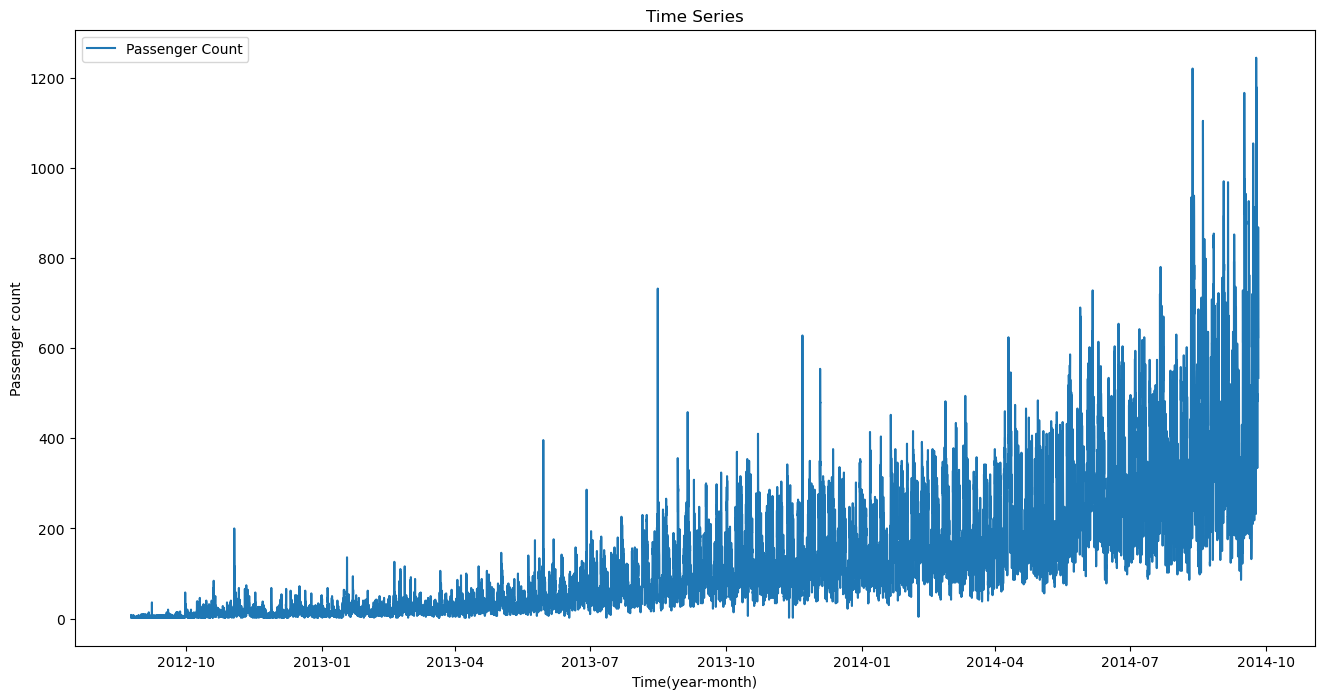

In [19]:
train.index = train['Datetime'] 
df=train.drop('ID',1) 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

Here we can infer that there is an increasing trend in the series, i.e., the number of counts is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on a particular day, due to some event the traffic was high.

Let us verify our hypothesis using the actual data

<Axes: xlabel='year'>

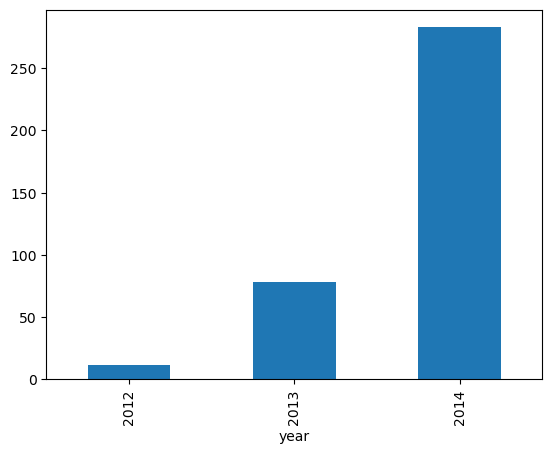

In [20]:
train.groupby('year')['Count'].mean().plot.bar()

<Axes: xlabel='month'>

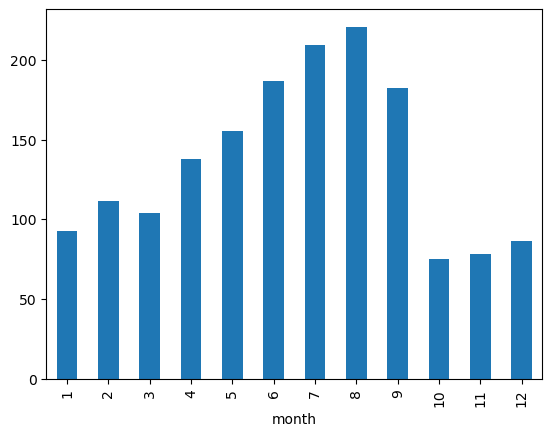

In [24]:
train.groupby('month')['Count'].mean().plot.bar()

<Axes: title={'center': 'Passenger Count(Monthwise)'}, xlabel='year,month'>

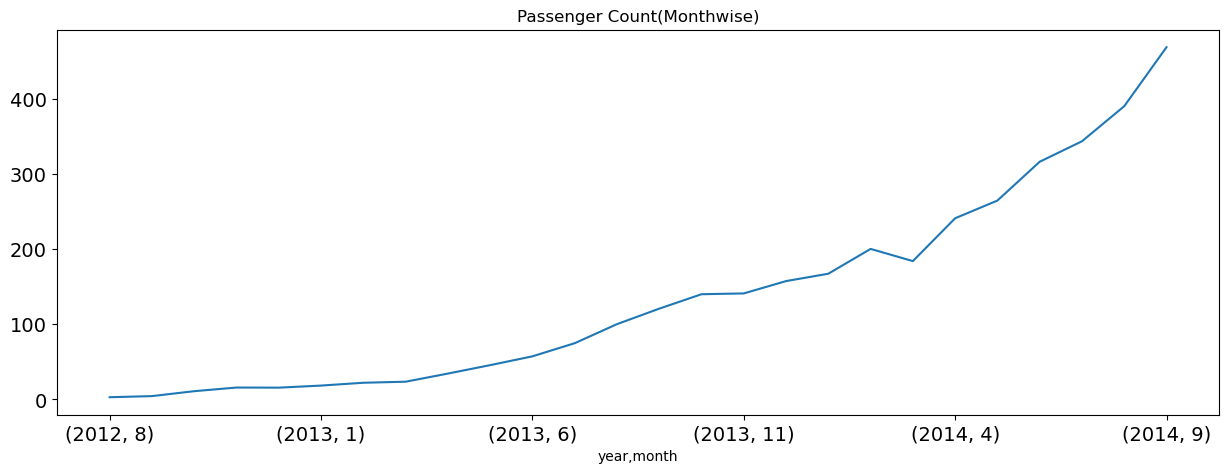

In [25]:
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

Exercise:

Plot hourly passenger count variation 

Write your inferences found here

1.
2.
3.


Exercise:

Plot weekend OR Weekday passenger count variation 

Write your inferences:

1.
2.
3.


we will drop the ID variable as it has nothing to do with the passenger count.

In [28]:
train=train.drop('ID',1)

As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series into daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn

In [29]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
hourly = train.resample('H').mean() 
daily = train.resample('D').mean() 
weekly = train.resample('W').mean() 
monthly = train.resample('M').mean()

Let’s look at the hourly, daily, weekly, and monthly time series.

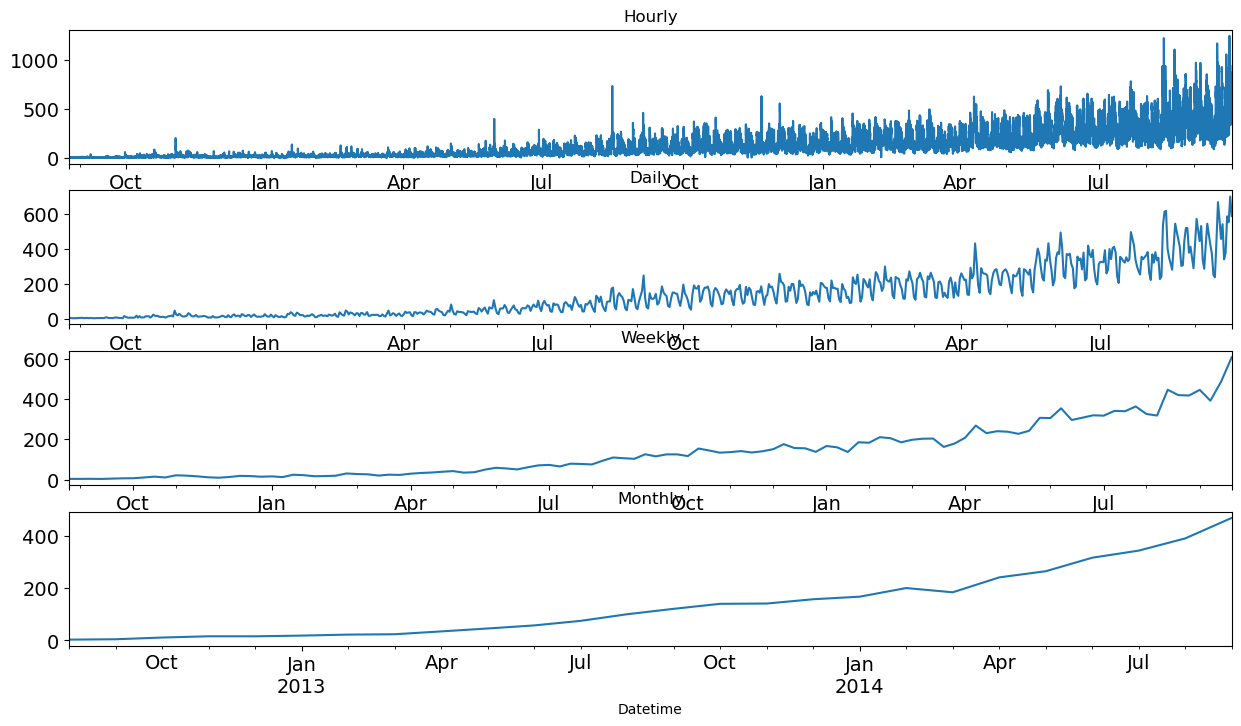

In [30]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 
plt.show()

We can see that the time series is becoming more and more stable when we are aggregating it on a daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily, and daily to hourly predictions, which will become a very expanded process. So, we will work on the daily time series.

In [32]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean() 
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp  
train = train.resample('D').mean()

**Modeling Techniques and Evaluation**

Now we will divide our data into train and validation. We will make a model on the train part and predict on the validation part to check the accuracy of our predictions.

 we will take the last 3 months as the validation data and the rest as training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have fewer data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for the validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

In [35]:
Train=train.loc['2012-08-25':'2014-06-24'] 
valid=train.loc['2014-06-25':'2014-09-25']

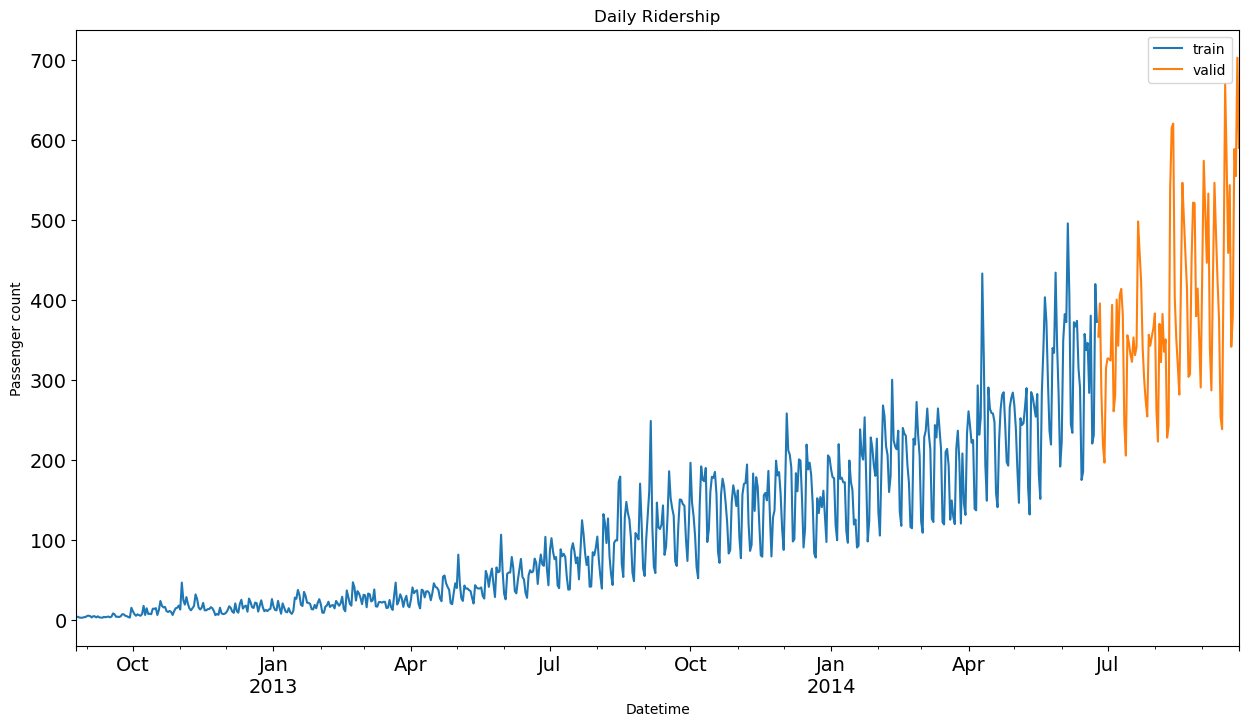

In [37]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

**Time Series Forecasting Models**

We will look at various models for Time Series Forecasting. Methods which we will be discussing for the forecasting are:

1. Naive Approach
2. Moving Average
3. Simple Exponential Smoothing
4. Holt’s Linear Trend Model

**1. Naive Approach**

In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction
we have to predict the passenger count for the next 2 days. A naive approach will assign the 5th day’s passenger count to the 6th and 7th day

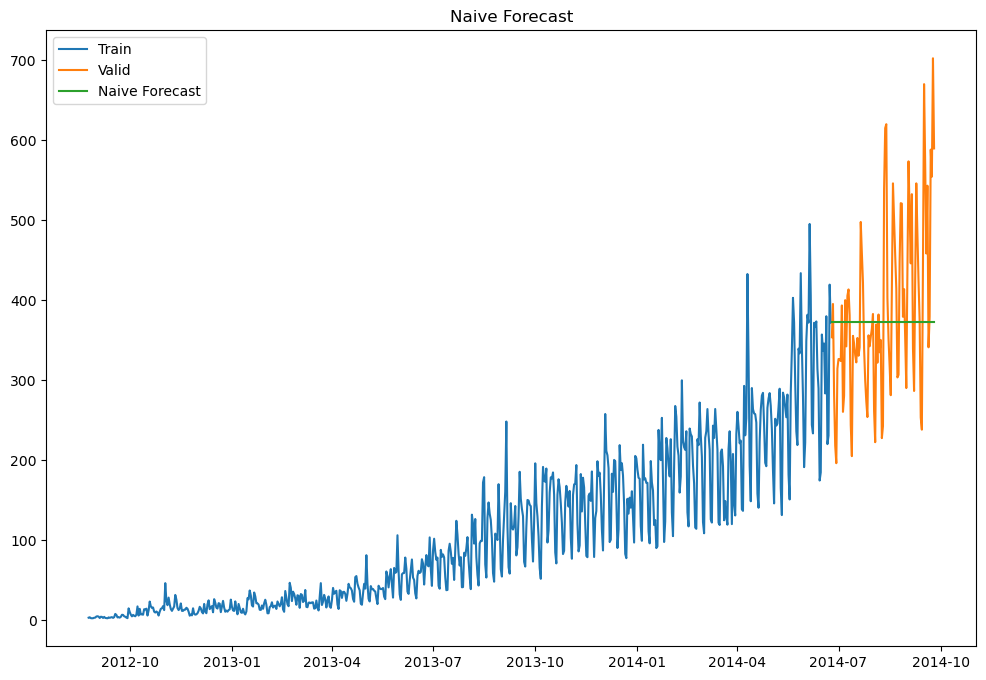

In [38]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

We can calculate how accurate our predictions are using rmse(Root Mean Square Error).
rmse is the standard deviation of the residuals.
Residuals are a measure of how far from the regression line data points are.

In [39]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)


111.79050467496724


We can infer that this method is not suitable for datasets with high variability. We can reduce the rmse value by adopting different techniques.

**2. Moving Average**

In this technique, we will take the average of the passenger counts for the last few time periods only.

Let’s try the rolling mean for the last 10, 20, and 50 days and visualize the results.


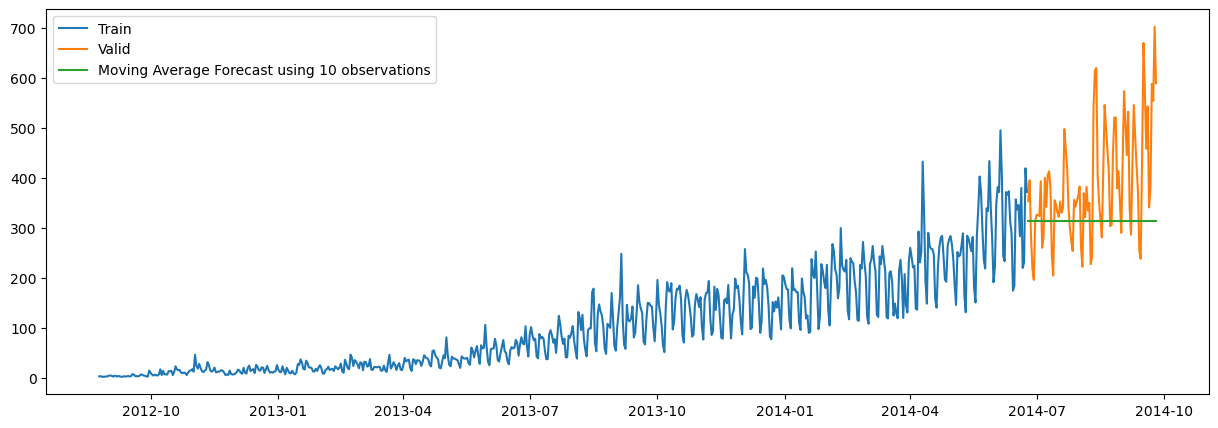

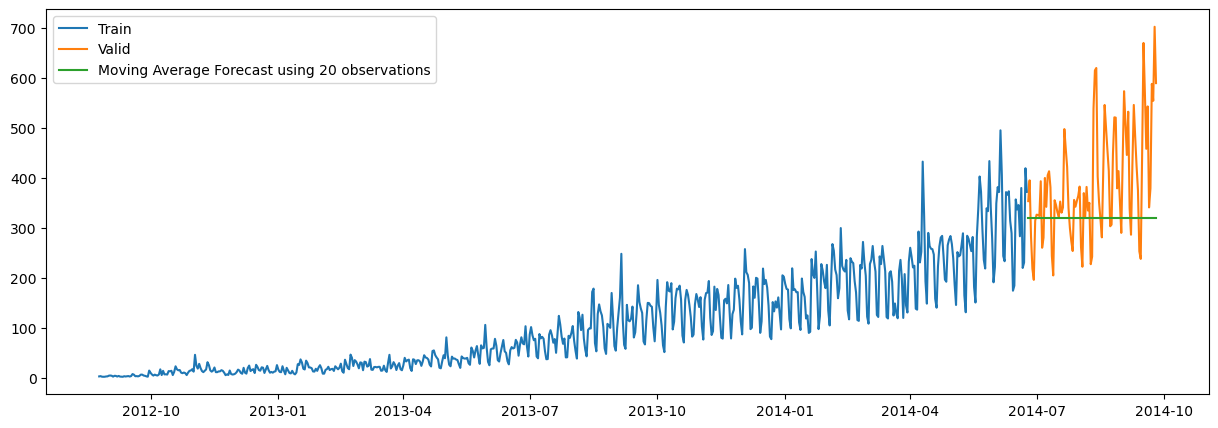

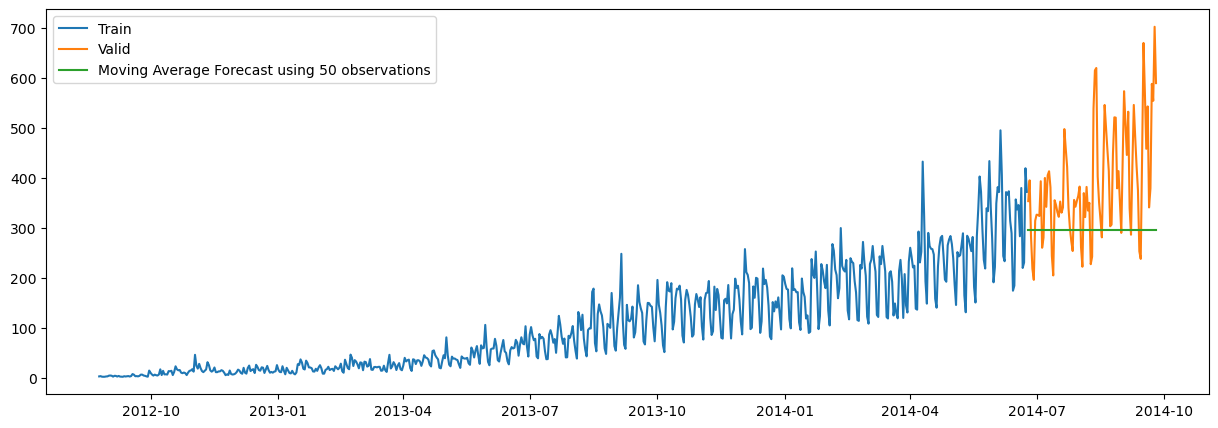

In [40]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], 
                label='Moving Average Forecast using 10 observations')
plt.legend(loc='best') 
plt.show()

y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], 
                label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show()

y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], 
                    label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [41]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

144.19175679986793


**3. Simple Exponential Smoothing**

we assign larger weights to more recent observations than to observations from the distant past.
The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.
If we give the entire weight to the last observed value only, this method will be similar to the naive approach.

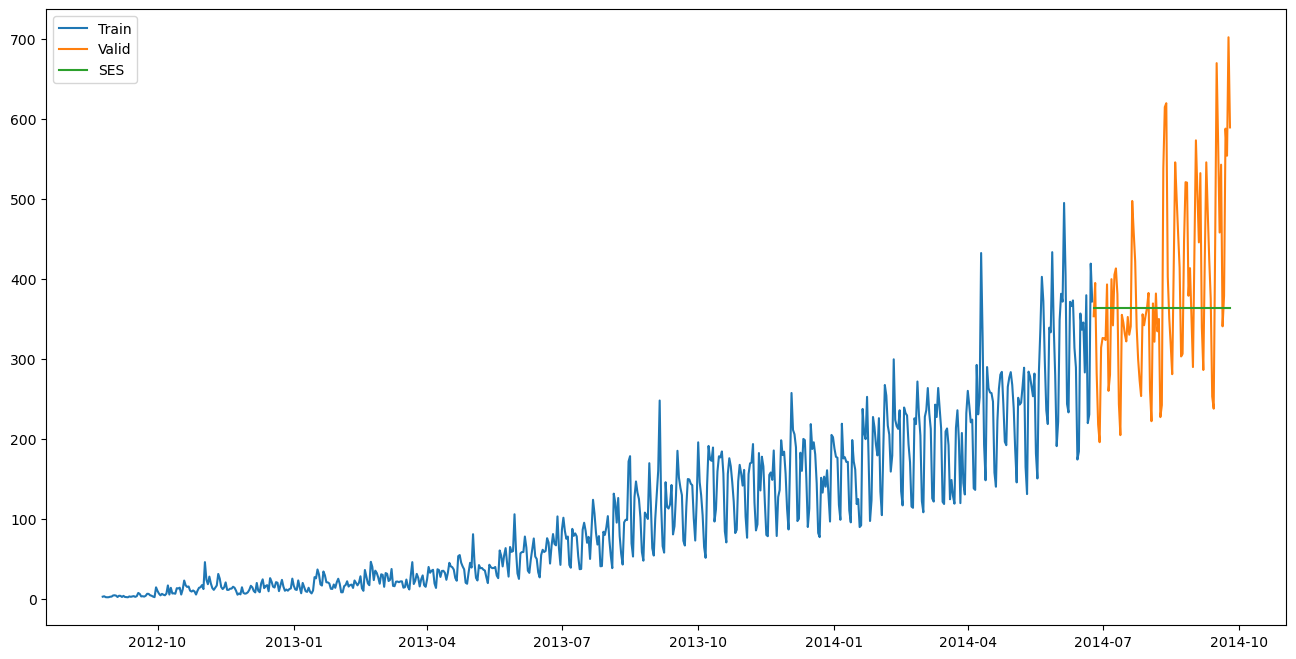

In [44]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,
        optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))  
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [45]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)

113.43708111884514


**4) Holt’s Linear Trend Model**

It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

First of all let us visualize the trend, seasonality, and error in the series.

1. Observed, which is the original time series.
2. Trend, which shows the trend in the time series, i.e., increasing or decreasing behavior of the time series.
3. Seasonal, which tells us about the seasonality in the time series.
4. Residual, which is obtained by removing any trend or seasonality in the time series.

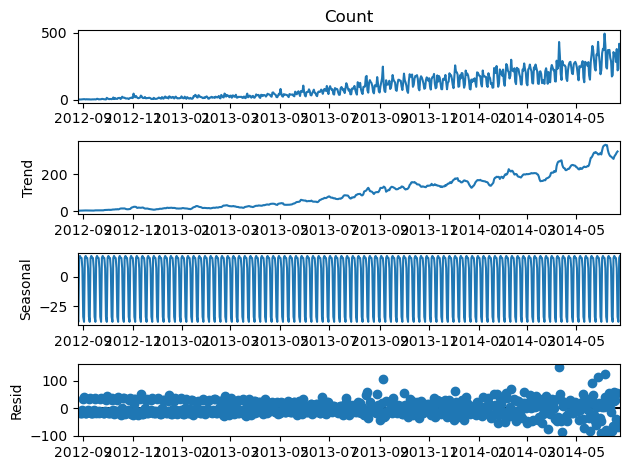

In [46]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

An increasing trend can be seen in the dataset, so now we will make a model based on the trend.



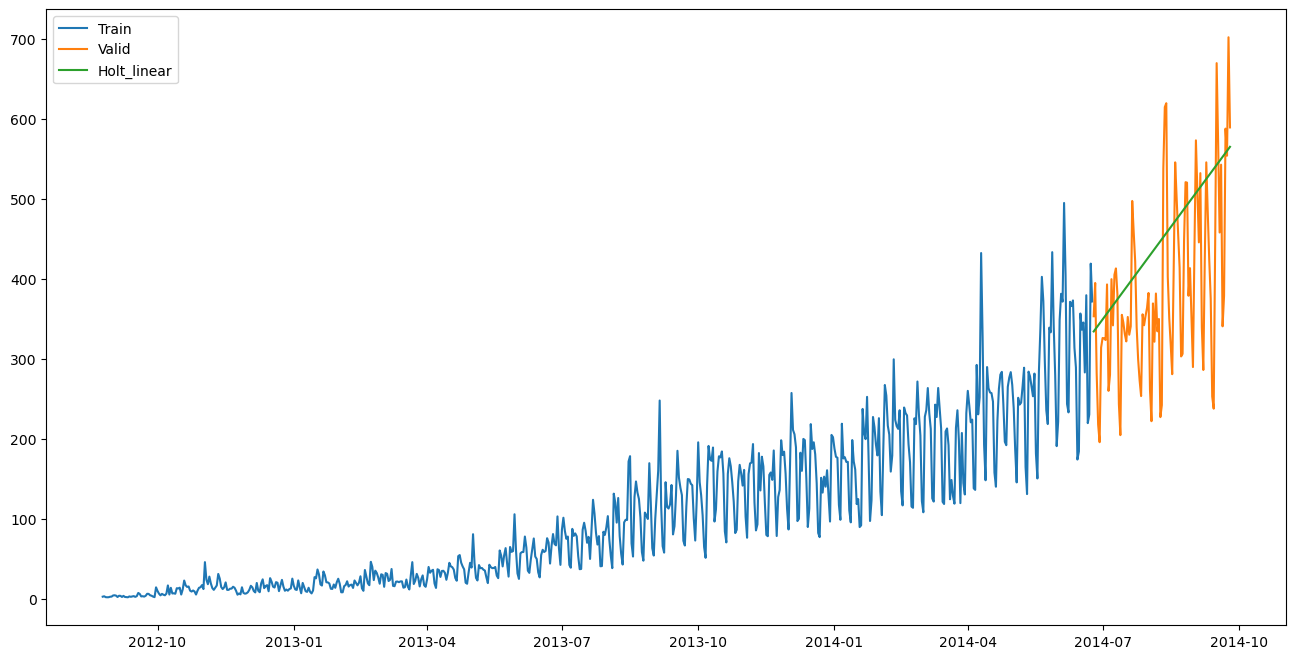

In [48]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,
        smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [49]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

112.94278345314041


**Advanced sequential models for timeseries forecasting**

The Long Short-Term Memory network, or LSTM network, is a recurrent neural network trained using Backpropagation Through Time

A block has components that make it smarter than a classical neuron and a memory for recent sequences. A block contains gates that manage the block’s state and output. A block operates upon an input sequence, and each gate within a block uses the sigmoid activation units to control whether it is triggered or not, making the change of state and addition of information flowing through the block conditional.

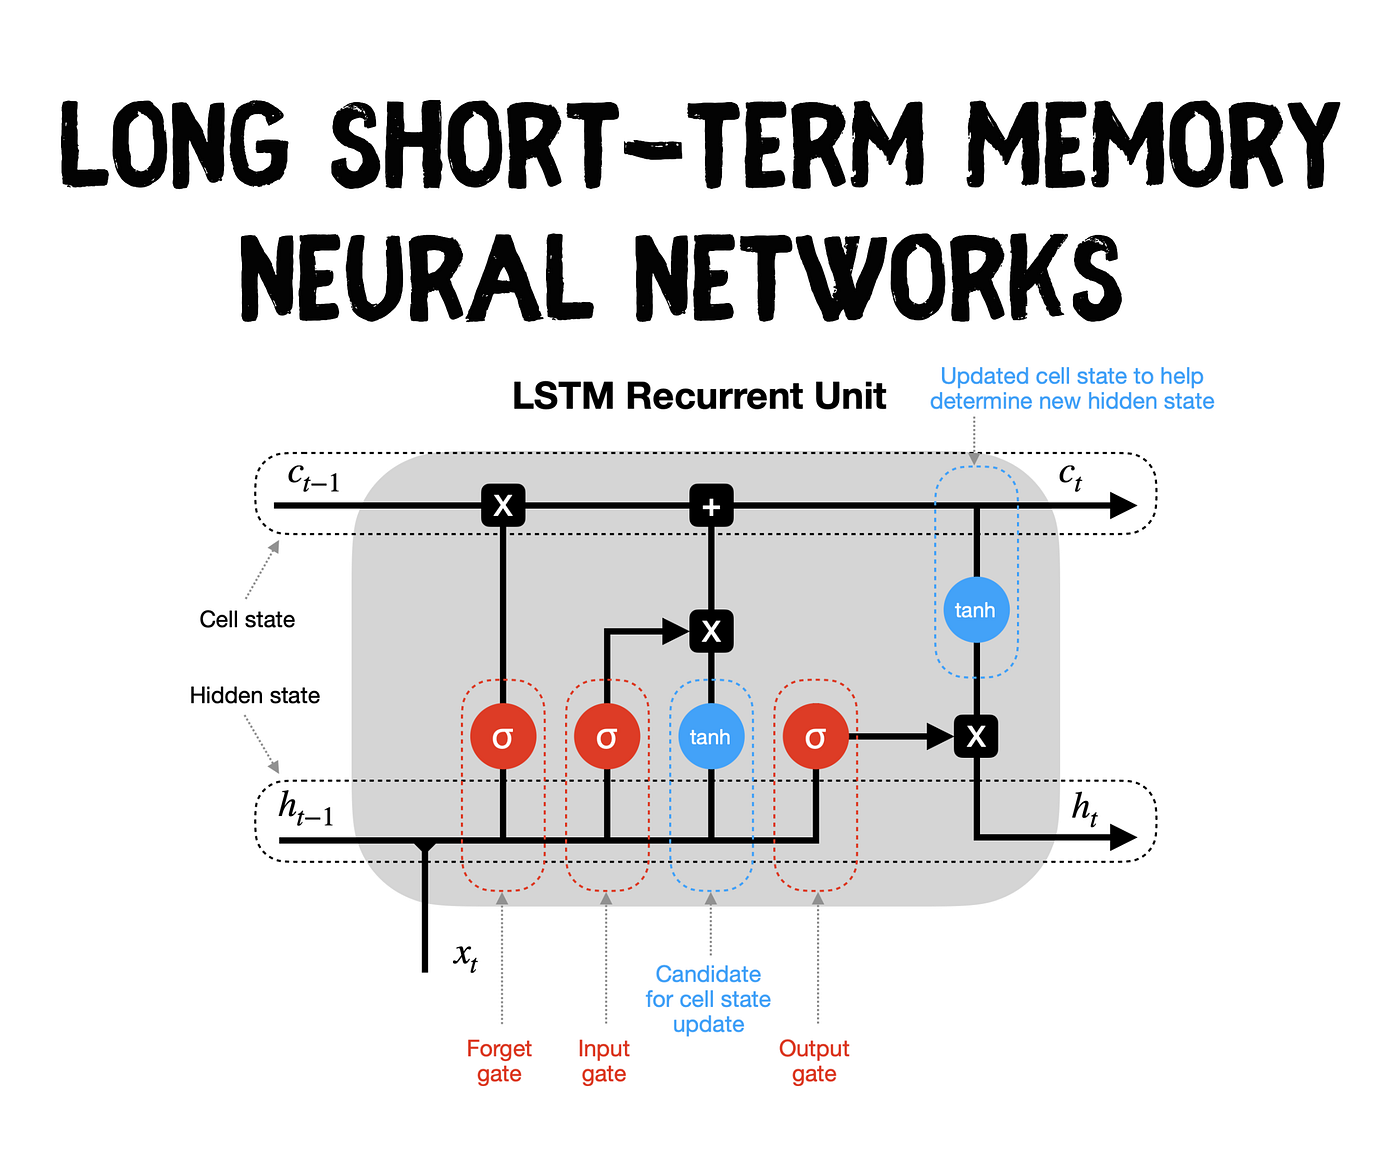

There are three types of gates within a unit:

1. Forget Gate: conditionally decides what information to throw away from the block
2. Input Gate: conditionally decides which values from the input to update the memory state
3. Output Gate: conditionally decides what to output based on input and the memory of the block

Each unit is like a mini-state machine where the gates of the units have weights that are learned during the training procedure.

In [51]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━ 171.8/189.3 MB 3.2 MB/s eta 0:00:06
ERROR: Exception:
Traceback (most recent call last):
  File "/Users/shives/anaconda3/lib/python3.10/site-packages/pip/_vendor/urllib3/response.py", line 437, in _error_catcher
    yield
  File "/Users/shives/anaconda3/lib/python3.10/site-packages/pip/_vendor/urllib3/response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "/Users/shives/anaconda3/lib/python3.10/site-packages/pip/_vendor/urllib3/response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "/Users/shives/anaconda3/lib/python3.10/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "/Users/shives/anaconda3/lib/python3.10/http/client.py", line 465, in read
    s = self.fp.read(amt)
  File "/Users/shives/anaconda3/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

In [ ]:

# make predictions
trainPredict = model.predict(train)
testPredict = model.predict(valid)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

**TASK**

Dataset on Air Passengers is provided
Number of air passengers per month

**Additional Resources**

https://www.tensorflow.org/tutorials/structured_data/time_series#setup